In [50]:
import pandas as pd
import numpy as np
import matplotlib

In [84]:
##调整matplotlib格式与字体
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
# ubuntu
#font_path = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
#font_prop = FontProperties(fname=font_path)
#matplotlib.rcParams['font.family'] = font_prop.get_name()

# mac os x
matplotlib.rcParams['font.family'] = 'AppleMyungjo'

%matplotlib inline

import seaborn as sns
sns.set(font='AppleMyungjo')

plt.rcParams['figure.figsize']=(20,10)

In [17]:
titanic=pd.read_csv('/Users/pactera/scikit-learn-book/data/titanic.csv')
titanic.head(5)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [18]:
from sklearn import feature_extraction

In [19]:
def one_hot_dataframe(data,cols,replace=False):
    '''
    data: DataFrame
    cols: DataFrame的列
    replace: 是否替换
    '''
    vec=feature_extraction.DictVectorizer()
    ##lambda 函数， 对每一行制作字典
    mkdict=lambda row: dict((col,row[col]) for col in cols)
    ##这一步很关键，注意axis=1是制定了对索引来执行apply
    vecData=pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict,axis=1)).toarray())
    vecData.columns=vec.get_feature_names()
    vecData.index=data.index
    if replace:
        data=data.drop(cols,axis=1)
        data=data.join(vecData)
    return (data,vecData)


In [42]:
cols=['pclass','embarked','sex']
mkdict=lambda row: dict((col,row[col]) for col in cols)
titanic[cols].apply(mkdict,axis=1)
##feature_extraction.DictVectorizer().fit_transform(titanic[cols].apply(mkdict,axis=1)).toarray()##dummies

KeyError: "['pclass' 'sex'] not in index"

In [29]:
titanic,titanic_n=one_hot_dataframe(titanic,['pclass','embarked','sex'],replace=True)

In [30]:
titanic.head(5)

,row.names,survived,name,age,home.dest,room,ticket,boat,embarked,embarked=Cherbourg,embarked=Queenstown,embarked=Southampton,pclass=1st,pclass=2nd,pclass=3rd,sex=female,sex=male
0,1,1,"Allen, Miss Elisabeth Walton",29.0000,"St Louis, MO",B-5,24160 L221,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,2,0,"Allison, Miss Helen Loraine",2.0000,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,3,0,"Allison, Mr Hudson Joshua Creighton",30.0000,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,4,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,5,1,"Allison, Master Hudson Trevor",0.9167,"Montreal, PQ / Chesterville, ON",C22,NaN,11,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [31]:
titanic.describe()

,row.names,survived,age,embarked,embarked=Cherbourg,embarked=Queenstown,embarked=Southampton,pclass=1st,pclass=2nd,pclass=3rd,sex=female,sex=male
count,1313.000000,1313.000000,633.000000,821.0,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,657.000000,0.341965,31.194181,0.0,0.154608,0.034273,0.436405,0.245240,0.213252,0.541508,0.352628,0.647372
std,379.174762,0.474549,14.747525,0.0,0.361668,0.181998,0.496128,0.430393,0.409760,0.498464,0.477970,0.477970
min,1.000000,0.000000,0.166700,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,329.000000,0.000000,21.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,657.000000,0.000000,30.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,985.000000,1.000000,41.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1313.000000,1.000000,71.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
titanic_n.head(5)

,embarked,embarked=Cherbourg,embarked=Queenstown,embarked=Southampton,pclass=1st,pclass=2nd,pclass=3rd,sex=female,sex=male
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [33]:
##下面吧剩余的类别特征编号
titanic,titanic_n=one_hot_dataframe(titanic,['home.dest','room','ticket','boat'],replace=True)

In [34]:
titanic.head(5)

,row.names,survived,name,age,embarked,embarked=Cherbourg,embarked=Queenstown,embarked=Southampton,pclass=1st,pclass=2nd,...,ticket=248744 L13,ticket=248749 L13,ticket=250647,ticket=27849,ticket=28220 L32 10s,ticket=34218 L10 10s,ticket=36973 L83 9s 6d,ticket=392091,ticket=7076,ticket=L15 1s
0,1,1,"Allen, Miss Elisabeth Walton",29.0000,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,"Allison, Miss Helen Loraine",2.0000,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,"Allison, Mr Hudson Joshua Creighton",30.0000,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,"Allison, Master Hudson Trevor",0.9167,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
titanic.columns

Index([u'row.names', u'survived', u'name', u'age', u'embarked',
       u'embarked=Cherbourg', u'embarked=Queenstown', u'embarked=Southampton',
       u'pclass=1st', u'pclass=2nd',
       ...
       u'ticket=248744 L13', u'ticket=248749 L13', u'ticket=250647',
       u'ticket=27849', u'ticket=28220 L32 10s', u'ticket=34218 L10 10s',
       u'ticket=36973 L83 9s 6d', u'ticket=392091', u'ticket=7076',
       u'ticket=L15 1s'],
      dtype='object', length=581)

In [37]:
titanic['age'].isnull() ##用isnull 检测数值特征是否出现NaN

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12       True
13       True
14       True
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29       True
        ...  
1283     True
1284     True
1285     True
1286     True
1287     True
1288     True
1289     True
1290     True
1291     True
1292     True
1293     True
1294     True
1295     True
1296     True
1297     True
1298     True
1299     True
1300     True
1301     True
1302     True
1303     True
1304     True
1305     True
1306     True
1307     True
1308     True
1309     True
1310     True
1311     True
1312     True
Name: age, Length: 1313, dtype: bool

In [38]:
#年龄数据用平均值替换缺失值，其他数据用零替换
mean=titanic['age'].mean()
titanic['age'].fillna(mean,inplace=True)
titanic.fillna(0,inplace=True)

In [43]:
##现在开始建立测试model
from sklearn.cross_validation import train_test_split
titanic_target=titanic['survived']
titanic_data=titanic.drop([u'name',u'row.names',u'survived'],axis=1)
titanic_data

,age,embarked,embarked=Cherbourg,embarked=Queenstown,embarked=Southampton,pclass=1st,pclass=2nd,pclass=3rd,sex=female,sex=male,...,ticket=248744 L13,ticket=248749 L13,ticket=250647,ticket=27849,ticket=28220 L32 10s,ticket=34218 L10 10s,ticket=36973 L83 9s 6d,ticket=392091,ticket=7076,ticket=L15 1s
0,29.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.916700,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,47.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,63.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,39.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,58.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,71.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
##数据集分割
X_train,X_test,Y_train,Y_test=train_test_split(titanic_data,titanic_target,test_size=0.25,random_state=33)

In [76]:
titanic_data.columns ##578个特征

Index([u'age', u'embarked', u'embarked=Cherbourg', u'embarked=Queenstown',
       u'embarked=Southampton', u'pclass=1st', u'pclass=2nd', u'pclass=3rd',
       u'sex=female', u'sex=male',
       ...
       u'ticket=248744 L13', u'ticket=248749 L13', u'ticket=250647',
       u'ticket=27849', u'ticket=28220 L32 10s', u'ticket=34218 L10 10s',
       u'ticket=36973 L83 9s 6d', u'ticket=392091', u'ticket=7076',
       u'ticket=L15 1s'],
      dtype='object', length=578)

In [46]:
##决策树模型
from sklearn import tree
dt=tree.DecisionTreeClassifier(criterion='entropy')
dt=dt.fit(X_train,Y_train)
from sklearn import metrics
Y_pred=dt.predict(X_test)
print "Accuracy: {0: .3f}".format(metrics.accuracy_score(Y_test,Y_pred)), "\n"

Accuracy:  0.836 



Feature Selection

In [107]:
##chi-suqare test
from sklearn import feature_selection
fs=feature_selection.SelectPercentile(feature_selection.chi2,percentile=6)
X_train_fs=fs.fit_transform(X_train,Y_train)
##现在X_train包含了统计上更为重要的特征

In [108]:
dt.fit(X_train_fs,Y_train)
X_test_fs=fs.transform(X_test)
Y_pred_fs=dt.predict(X_test_fs)
print "Accuracy: {0: .3f}".format(metrics.accuracy_score(Y_test,Y_pred_fs)), "\n"

Accuracy:  0.860 



In [93]:
##暴力搜索选择最优参数集
from sklearn import cross_validation
percentiles=range(1,100,5)
results=np.array([])
for i in range(1,100,5):
    fs=feature_selection.SelectPercentile(feature_selection.chi2,percentile=i)
    X_train_fs=fs.fit_transform(X_train,Y_train)
    ##这一步的函数？
    scores=cross_validation.cross_val_score(dt,X_train_fs,Y_train,cv=5)
    results=np.append(results,scores.mean())
##重要！！！！
optimal_percentil=np.argmax(results);
##optimal_percentil
print results
print "Optimal number of features: {0}".format(percentiles[optimal_percentil]),"\n"


[ 0.83332303  0.87804576  0.86993403  0.87400536  0.86890332  0.86789322
  0.86992373  0.86994434  0.87092352  0.87194393  0.87093383  0.86889301
  0.86990311  0.87195424  0.86890332  0.86790353  0.86688312  0.86791383
  0.87196454  0.86687281]
Optimal number of features: 6 



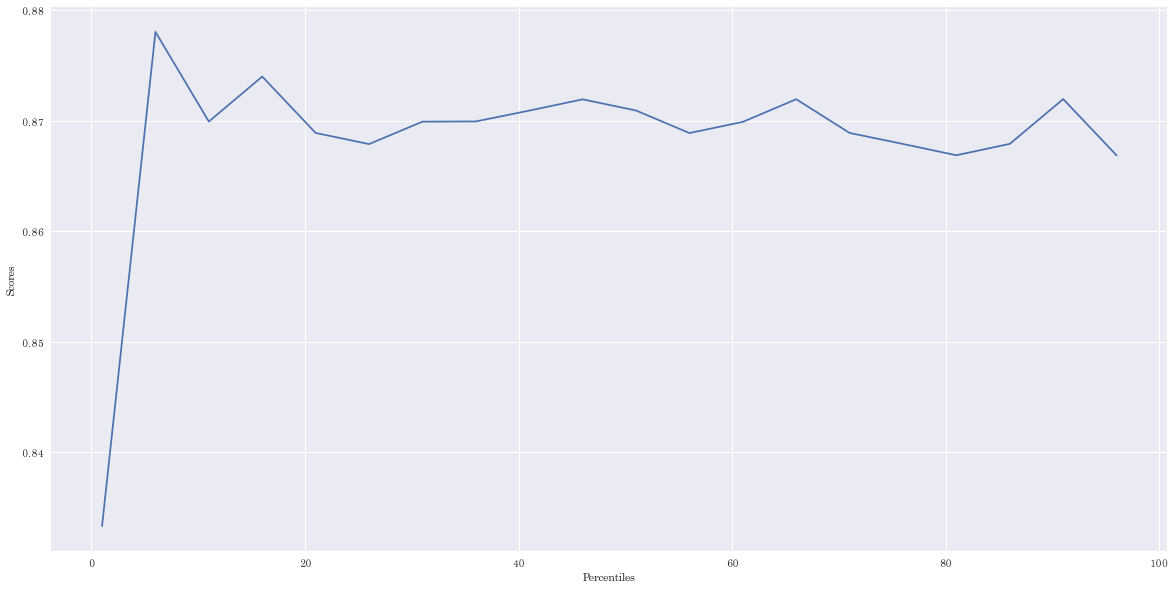

In [94]:
## 画出特征的数量与交叉验证的折线图
plt.xlabel('Percentiles')
plt.ylabel('Scores')
plt.plot(percentiles,results,label="Scores")

In [103]:
##用得到的最优比例进行训练
fs=feature_selection.SelectPercentile(feature_selection.chi2,percentile=6)
X_train_fs=fs.fit_transform(X_train,Y_train)##这一步的含义要明确
dt.fit(X_train_fs,Y_train)
X_test_fs=fs.transform(X_test)
Y_pred_fs=dt.predict(X_test_fs)
print "Accuracy: {0: .3f}".format(metrics.accuracy_score(Y_test,Y_pred_fs)), "\n"

Accuracy:  0.863 



In [104]:
##换不同的模型
dt=tree.DecisionTreeClassifier(criterion='entropy')
##交叉验证函数在测试集上运行dt并评估
scores=cross_validation.cross_val_score(dt,X_train_fs,Y_train,cv=5)
print "Entropy criterion accurancy on cv: {0:.3f}".format(scores.mean())
dt2=tree.DecisionTreeClassifier(criterion='gini')
scores=cross_validation.cross_val_score(dt2,X_train_fs,Y_train,cv=5)
print "Gini criterion accurancy on cv: {0:.3f}".format(scores.mean())

Entropy criterion accurancy on cv: 0.875
Gini criterion accurancy on cv: 0.880


In [106]:
##测试集上用Gini参数
dt2.fit(X_train_fs,Y_train)
X_test_fs=fs.transform(X_test)
Y_pred_fs=dt2.predict(X_test_fs)
print "Accuracy: {0:.3f}".format(metrics.accuracy_score(Y_test,Y_pred_fs)), "\n"

Accuracy: 0.863 



与Entropy参数的结果相比（都是选取了6%的特征）略有提升，但是实际上常常会发生性能折损，因为有过拟合。

In [109]:
##Model Selection